In [1]:
import numpy as np

In [2]:
#nn with 4 inputs going to a hidden layer with 3 neurons
inputs = [[1,2,3,4], 
          [2.5,3,1,2], 
          [-1.5,5,2,3]]

weights = [[0.2,0.3,0.1,0.6],
          [0.7,0.2,-0.24,0.1],
          [0.26,-.98,0.2,0.3]]

biases = [2,3,0.5]

layer = np.dot(inputs, np.array(weights).T) + biases

In [3]:
layer

array([[ 5.5 ,  3.78,  0.6 ],
       [ 4.7 ,  5.31, -0.99],
       [ 5.2 ,  2.77, -3.49]])

In [4]:
#nn with 4 inputs -> hidden layer w/ 3 neurons -> hidden layer w/ 3 neurons
weights2 = [[0.3,-0.3,0.21],
          [0.7,0.21,-0.2],
          [0.1,-.98,0.72]]

biases2 = [5,1,2.5]

layer1 = np.dot(inputs, np.array(weights).T) + biases
layer2 = np.dot(layer1, np.array(weights2).T) + biases2
layer2

array([[ 5.642 ,  5.5238, -0.2224],
       [ 4.6091,  5.6031, -2.9466],
       [ 4.9961,  5.9197, -2.2074]])

In [5]:
#importing synthetic data
import nnfs
nnfs.init()

In [6]:
from nnfs.datasets import spiral_data
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
X, y = spiral_data(samples=100, classes=3)

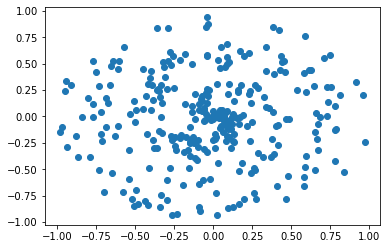

In [8]:
plt.scatter(X[:,0], X[:,1])

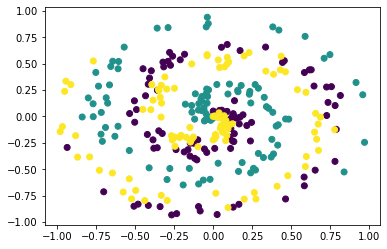

In [9]:
plt.scatter(X[:,0], X[:,1], c=y)

In [10]:
0.01 * np.random.randn(5)

array([-0.01306527,  0.01658131, -0.00118164, -0.00680178,  0.00666383],
      dtype=float32)

In [11]:
#Creating a dense class

class Layer_Dense:
    
    #Layer initialization
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
        
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

In [12]:
#running the class

dense1 = Layer_Dense(2,3)
dense1.forward(X)
print(dense1.output[:5])

[[ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [ 5.3124451e-05 -5.5361892e-05 -5.3239353e-05]
 [ 4.8625687e-05 -1.9669959e-04 -1.9427804e-04]
 [-1.0724009e-04 -4.0703916e-04 -4.0962288e-04]
 [-1.1640315e-04 -5.3941528e-04 -5.4189982e-04]]


In [13]:
#Defining a ReLU activation function

class Activation_ReLU:
    
    # Takes in inputs and outputs either 0 or the input if it is greater than 0
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

In [14]:
# No more negatives!
X, y = spiral_data(samples=100, classes=3)
dense1 = Layer_Dense(2,3)
activation1 = Activation_ReLU()
dense1.forward(X)
activation1.forward(dense1.output)
print(activation1.output[:5])

[[0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [4.6800040e-05 9.3243525e-06 0.0000000e+00]
 [1.6514266e-05 6.0805462e-05 1.5202666e-05]
 [0.0000000e+00 1.4214343e-04 9.7367949e-05]
 [0.0000000e+00 2.5378630e-04 2.3917461e-04]]


In [15]:
# Defining a Softmax activation function, great for output layer as it outputs probabilities of each given class.
class Activation_Softmax:
    
    def forward(self, inputs):
        
        #Get unnormalized probabilities by exponentiating the inputs
        #We also subtract the largest number from the whole list of numbers to avoid
        #"exploding" values
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        
        #Normalize values
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        
        self.output = probabilities

In [16]:
# All of the numbers in each row add up to one.
X, y = spiral_data(samples=100, classes=3)
dense1 = Layer_Dense(2,3)
activation1 = Activation_Softmax()
dense1.forward(X)
activation1.forward(dense1.output)
print(activation1.output[:5])

[[0.33333334 0.33333334 0.33333334]
 [0.33328485 0.33336273 0.33335242]
 [0.33324254 0.33336842 0.33338907]
 [0.3331784  0.33342406 0.33339748]
 [0.33309835 0.3334548  0.33344683]]


In [17]:
#A common loss class using mean
class Loss:
        
        def calculate(self, output, y):
            
            sample_losses = self.forward(output, y)
            
            data_loss = np.mean(sample_losses)
            
            return data_loss

In [20]:
#Cross-entropy loss class
class Loss_CategoricalCrossentropy(Loss):
    
    def forward(self, y_pred, y_true):
        
        #Number of sample in batch
        samples = len(y_pred)
        
        #Clipping the predictions do avoid a 0 and 1
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
        
        #Probabilities for target if categoricaly label
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[range(samples), y_true]
        
        #Probabilities for target if one-hot encoded
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(y_pred_clipped*y_true, axis=1)
            
        #The loss calculated
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

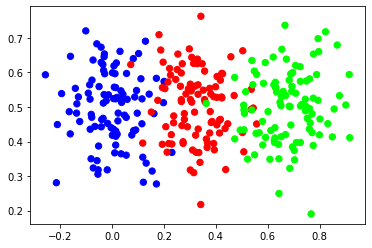

In [28]:
#Lets try a different dataset for this next problem and then our original
from nnfs.datasets import vertical_data

X, y = vertical_data(samples=100, classes=3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='brg')
plt.show()

In [21]:
#We have some outputs as well as loss. Now how do we update the weights and find where the loss is minimized.
#Below will be a brute force way of finding the lowest loss.

#Create dataset
X, y = vertical_data(samples=100, classes=3)

# Create model
dense1 = Layer_Dense(2, 3) # first dense layer, 2 inputs
activation1 = Activation_ReLU()

dense2 = Layer_Dense(3, 3) # second dense layer, 3 inputs, 3 outputs
activation2 = Activation_Softmax()

# Create loss function
loss_function = Loss_CategoricalCrossentropy()

In [22]:
#Creating some helper variables to keep tack of the best weights and biases
lowest_loss = 9999999 # some initial value
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()

In [26]:
for iteration in range(100000):
    
    # Generate a new set of weights for iteration
    dense1.weights = 0.05 * np.random.randn(2, 3)
    dense1.biases = 0.05 * np.random.randn(1, 3)
    dense2.weights = 0.05 * np.random.randn(3, 3)
    dense2.biases = 0.05 * np.random.randn(1, 3)
    
    # Perform a forward pass of the training data through this layer
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)
    
    # Perform a forward pass through activation function
    # it takes the output of second dense layer here and returns loss
    loss = loss_function.calculate(activation2.output, y)
    
    # Calculate accuracy from output of activation2 and targets
    # calculate values along first axis
    predictions = np.argmax(activation2.output, axis=1)
    accuracy = np.mean(predictions == y)
    
    # If loss is smaller - print and save weights and biases aside
    if loss < lowest_loss:
        print('New set of weights found, iteration:', iteration,
                'loss:', loss, 'acc:', accuracy)
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.biases.copy()
        lowest_loss = loss

New set of weights found, iteration: 30160 loss: 1.094976 acc: 0.3333333333333333
New set of weights found, iteration: 32234 loss: 1.0945095 acc: 0.3333333333333333


In [27]:
#Setting weights and biases randomly doesn't work to well...
#What if we instead add a small amount to the best weights and biases.

for iteration in range(100000):
    
    # Update weights with some small random values
    dense1.weights += 0.05 * np.random.randn(2, 3)
    dense1.biases += 0.05 * np.random.randn(1, 3)
    dense2.weights += 0.05 * np.random.randn(3, 3)
    dense2.biases += 0.05 * np.random.randn(1, 3)
    
    # Perform a forward pass of the training data through this layer
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)
    
    # Perform a forward pass through activation function
    # it takes the output of second dense layer here and returns loss
    loss = loss_function.calculate(activation2.output, y)
    
    # Calculate accuracy from output of activation2 and targets
    # calculate values along first axis
    predictions = np.argmax(activation2.output, axis=1)
    accuracy = np.mean(predictions == y)
    
    # If loss is smaller - print and save weights and biases aside
    if loss < lowest_loss:
        print('New set of weights found, iteration:', iteration,
        'loss:', loss, 'acc:', accuracy)
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.biases.copy()
        lowest_loss = loss
    # Revert weights and biases
    else:
        dense1.weights = best_dense1_weights.copy()
        dense1.biases = best_dense1_biases.copy()
        dense2.weights = best_dense2_weights.copy()
        dense2.biases = best_dense2_biases.copy()

New set of weights found, iteration: 10 loss: 1.0935242 acc: 0.3333333333333333
New set of weights found, iteration: 11 loss: 1.08927 acc: 0.63
New set of weights found, iteration: 13 loss: 1.0880278 acc: 0.3333333333333333
New set of weights found, iteration: 15 loss: 1.0868187 acc: 0.5733333333333334
New set of weights found, iteration: 20 loss: 1.0757915 acc: 0.73
New set of weights found, iteration: 23 loss: 1.0635726 acc: 0.83
New set of weights found, iteration: 28 loss: 1.0612012 acc: 0.6666666666666666
New set of weights found, iteration: 31 loss: 1.0576141 acc: 0.6633333333333333
New set of weights found, iteration: 35 loss: 1.05425 acc: 0.6633333333333333
New set of weights found, iteration: 36 loss: 1.0496945 acc: 0.6633333333333333
New set of weights found, iteration: 37 loss: 1.0422912 acc: 0.42
New set of weights found, iteration: 41 loss: 1.0400251 acc: 0.45
New set of weights found, iteration: 43 loss: 1.0354244 acc: 0.3333333333333333
New set of weights found, iteratio

New set of weights found, iteration: 1085 loss: 0.19224668 acc: 0.9366666666666666
New set of weights found, iteration: 1092 loss: 0.19100662 acc: 0.94
New set of weights found, iteration: 1099 loss: 0.19080015 acc: 0.94
New set of weights found, iteration: 1113 loss: 0.18966784 acc: 0.9433333333333334
New set of weights found, iteration: 1115 loss: 0.1886586 acc: 0.9433333333333334
New set of weights found, iteration: 1142 loss: 0.18795949 acc: 0.9433333333333334
New set of weights found, iteration: 1153 loss: 0.18750499 acc: 0.9433333333333334
New set of weights found, iteration: 1159 loss: 0.18721998 acc: 0.94
New set of weights found, iteration: 1169 loss: 0.1867865 acc: 0.94
New set of weights found, iteration: 1171 loss: 0.18654393 acc: 0.94
New set of weights found, iteration: 1186 loss: 0.18643826 acc: 0.94
New set of weights found, iteration: 1212 loss: 0.18531173 acc: 0.9433333333333334
New set of weights found, iteration: 1215 loss: 0.18446666 acc: 0.9466666666666667
New set

New set of weights found, iteration: 4760 loss: 0.16072497 acc: 0.94
New set of weights found, iteration: 5186 loss: 0.16066793 acc: 0.9366666666666666
New set of weights found, iteration: 5229 loss: 0.16053617 acc: 0.94
New set of weights found, iteration: 5245 loss: 0.16053559 acc: 0.94
New set of weights found, iteration: 5261 loss: 0.16047202 acc: 0.9333333333333333
New set of weights found, iteration: 5333 loss: 0.1603407 acc: 0.9366666666666666
New set of weights found, iteration: 5387 loss: 0.16033046 acc: 0.9366666666666666
New set of weights found, iteration: 5418 loss: 0.16027768 acc: 0.9366666666666666
New set of weights found, iteration: 5742 loss: 0.16020693 acc: 0.94
New set of weights found, iteration: 5859 loss: 0.16018811 acc: 0.94
New set of weights found, iteration: 6160 loss: 0.16018425 acc: 0.9366666666666666
New set of weights found, iteration: 6314 loss: 0.16017896 acc: 0.94
New set of weights found, iteration: 6729 loss: 0.16017698 acc: 0.94
New set of weights f

In [32]:
#This actualy works really well! Basically we are mimicing Gradient Descent.
#Although, lets try our original dataset.
X, y = spiral_data(samples=100, classes=3)

# Create model
dense1 = Layer_Dense(2, 3) # first dense layer, 2 inputs
activation1 = Activation_ReLU()

dense2 = Layer_Dense(3, 3) # second dense layer, 3 inputs, 3 outputs
activation2 = Activation_Softmax()

# Create loss function
loss_function = Loss_CategoricalCrossentropy()


In [33]:
#Reset out lowest loss
lowest_loss = 9999999 # some initial value

In [34]:
for iteration in range(100000):
    
    # Update weights with some small random values
    dense1.weights += 0.05 * np.random.randn(2, 3)
    dense1.biases += 0.05 * np.random.randn(1, 3)
    dense2.weights += 0.05 * np.random.randn(3, 3)
    dense2.biases += 0.05 * np.random.randn(1, 3)
    
    # Perform a forward pass of the training data through this layer
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)
    
    # Perform a forward pass through activation function
    # it takes the output of second dense layer here and returns loss
    loss = loss_function.calculate(activation2.output, y)
    
    # Calculate accuracy from output of activation2 and targets
    # calculate values along first axis
    predictions = np.argmax(activation2.output, axis=1)
    accuracy = np.mean(predictions == y)
    
    # If loss is smaller - print and save weights and biases aside
    if loss < lowest_loss:
        print('New set of weights found, iteration:', iteration,
        'loss:', loss, 'acc:', accuracy)
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.biases.copy()
        lowest_loss = loss
    # Revert weights and biases
    else:
        dense1.weights = best_dense1_weights.copy()
        dense1.biases = best_dense1_biases.copy()
        dense2.weights = best_dense2_weights.copy()
        dense2.biases = best_dense2_biases.copy()

New set of weights found, iteration: 0 loss: 1.0989665 acc: 0.3333333333333333
New set of weights found, iteration: 3 loss: 1.0983516 acc: 0.3333333333333333
New set of weights found, iteration: 4 loss: 1.0978377 acc: 0.36
New set of weights found, iteration: 9 loss: 1.0971663 acc: 0.35
New set of weights found, iteration: 12 loss: 1.0962113 acc: 0.3466666666666667
New set of weights found, iteration: 13 loss: 1.0956208 acc: 0.36333333333333334
New set of weights found, iteration: 19 loss: 1.0937483 acc: 0.4033333333333333
New set of weights found, iteration: 21 loss: 1.092954 acc: 0.3233333333333333
New set of weights found, iteration: 24 loss: 1.0926944 acc: 0.33666666666666667
New set of weights found, iteration: 33 loss: 1.0913662 acc: 0.35
New set of weights found, iteration: 34 loss: 1.0905627 acc: 0.39
New set of weights found, iteration: 35 loss: 1.0903707 acc: 0.37666666666666665
New set of weights found, iteration: 36 loss: 1.0900196 acc: 0.42333333333333334
New set of weight

New set of weights found, iteration: 9964 loss: 1.0425453 acc: 0.39666666666666667
New set of weights found, iteration: 10946 loss: 1.0425321 acc: 0.39666666666666667
New set of weights found, iteration: 10956 loss: 1.0419221 acc: 0.4066666666666667
New set of weights found, iteration: 12589 loss: 1.0417132 acc: 0.42333333333333334
New set of weights found, iteration: 15481 loss: 1.041641 acc: 0.41
New set of weights found, iteration: 16133 loss: 1.0416279 acc: 0.39666666666666667
New set of weights found, iteration: 16437 loss: 1.0412248 acc: 0.42333333333333334
New set of weights found, iteration: 16794 loss: 1.0411084 acc: 0.4166666666666667
New set of weights found, iteration: 17213 loss: 1.0410644 acc: 0.42
New set of weights found, iteration: 17446 loss: 1.0410241 acc: 0.41333333333333333
New set of weights found, iteration: 18314 loss: 1.0409184 acc: 0.41
New set of weights found, iteration: 18348 loss: 1.0407656 acc: 0.3933333333333333
New set of weights found, iteration: 18410

In [ ]:
#Sadly it doesn't look like this approach will work afterall.